# 大量文字を学習する用のデータ生成のテスト

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import keras.utils.image_utils as image
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import array_to_img


2022-12-18 15:26:59.607426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 15:26:59.696815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 15:26:59.696847: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 15:26:59.719528: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-18 15:27:00.152019: W tensorflow/stream_executor/platform/de

Text(0, 0.2, 'Python')

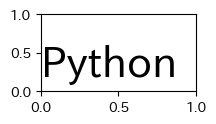

In [2]:
# FigureとAxes
fig, ax = plt.subplots(figsize=(2, 1))

# 座標(0.4, 0.4)にテキストを表示する
#ax.text(0, 0.4, "Python", size=30,fontname="Droid Sans")
#findfont: Font family 'Droid Sans' not found.と出てしまう。
ax.text(0, 0.2, "Python", size=30)

/usr/share/fonts/opentype/ipafont-mincho/ipam.ttf: IPAMincho,IPA明朝:style=Regular
/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf: IPAPGothic,IPA Pゴシック:style=Regular
/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf: Droid Sans Fallback:style=Regular
/usr/share/fonts/opentype/ipafont-mincho/ipamp.ttf: IPAPMincho,IPA P明朝:style=Regular
/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf: IPAGothic,IPAゴシック:style=Regular
/usr/share/fonts/truetype/fonts-japanese-mincho.ttf: IPAMincho,IPA明朝:style=Regular
/usr/share/fonts/truetype/fonts-japanese-gothic.ttf: IPAGothic,IPAゴシック:style=Regular


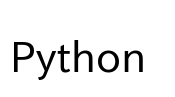

In [3]:
!fc-list :lang=ja

# FigureとAxes
fig, ax = plt.subplots(figsize=(2, 1))

# 座標(0.4, 0.4)にテキストを表示する
#ax.text(0, 0.4, "Python", size=30,fontname="Droid Sans")
#findfont: Font family 'Droid Sans' not found.と出てしまう。
ax.text(0, 0.2, "Python", size=30)

#しかし、これでは座標軸も含めてsaveされてしまうので、ちょっと使えない気がしなくもない
#消す方法はある様子。これが求めていたもの！
#thanks!
#https://qiita.com/tsukada_cs/items/8d31a25cd7c860690270
ax.axis("off")
plt.savefig("/tmp/sample.jpg")


(64, 64, 3)


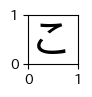

In [4]:
#次は日本語
#FigureとAxes
fig, ax = plt.subplots(figsize=(0.64, 0.64))

# 座標(0.4, 0.4)にテキストを表示する
#ax.text(0, 0.4, "Python", size=30,fontname="Droid Sans")
#findfont: Font family 'Droid Sans' not found.と出てしまう。
ax.text(0, 0.2, "こ", size=32)
#ax.axis("off")
file_name = "./temp_ja.jpg"
#テンポラリ
plt.savefig(file_name)
ja_c = image.load_img(file_name)
ja_c = np.array(ja_c)
print(ja_c.shape)

In [5]:
#日本語のコーパスを持ってきて、文字を全部一度に読み込み。重複を削除した文字一覧を作成する。（漢字やカタカナなどを含む)

#コードは以下をそのまま流用させていただきました。大変ありがとうございます。
#https://qiita.com/y_itoh/items/fa04c1e2f3df2e807d61

import re
import zipfile
import urllib.request
import os.path
import glob

URL = 'https://www.aozora.gr.jp/cards/000081/files/43737_ruby_19028.zip'


def load(dir):
    path = os.path.join(dir,'*.txt') #➆
    list = glob.glob(path) #➇
    return list[0] #➈


def download(URL):
    zip_file = re.split(r'/', URL)[-1] #➀
    dir = os.path.splitext(zip_file)[0]
    
    #すでにＤＬ済みの場合、読み込んで終了。
    if os.path.exists(dir):
        print("[TRACE] already downloaded")
        return load(dir)
        
    urllib.request.urlretrieve(URL, zip_file) #➁
    dir = os.path.splitext(zip_file)[0] #➂

    with zipfile.ZipFile(zip_file) as zip_object: #➃
        zip_object.extractall(dir) #➄

    os.remove(zip_file) #➅

    path = os.path.join(dir,'*.txt') #➆
    list = glob.glob(path) #➇
    return list[0] #➈


def convert(download_text):
    data = open(download_text, 'rb').read() #➀
    text = data.decode('shift_jis') #➁

    # 本文抽出
    text = re.split(r'\-{5,}', text)[2] #➂  
    text = re.split(r'底本：', text)[0] #➃
    text = re.split(r'［＃改ページ］', text)[0] #➄

    # ノイズ削除
    text = re.sub(r'《.+?》', '', text) #➅
    text = re.sub(r'［＃.+?］', '', text) #➆
    text = re.sub(r'｜', '', text) #➇
    text = re.sub(r'\r\n', '', text) #➈
    text = re.sub(r'\u3000', '', text) #➉   

    return text

download_file = download(URL)
print("[DEBUG] download_file = %s" % (download_file) )
#[DEBUG] download_file = 43737_ruby_19028/gingatetsudono_yoru.txt
text = convert(download_file)

#print(text)
print(len(text))

[TRACE] already downloaded
[DEBUG] download_file = 43737_ruby_19028/gingatetsudono_yoru.txt
42563


In [6]:
dupremoved_text = list(set(list(text)))
print(len(dupremoved_text))

1000


/tmp/ipykernel_3664/3382475279.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(0.64, 0.64))


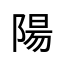

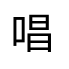

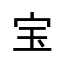

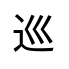

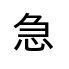

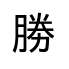

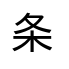

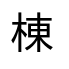

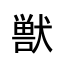

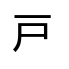

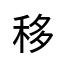

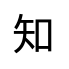

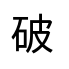

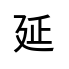

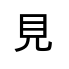

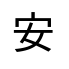

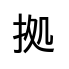

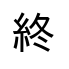

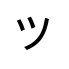

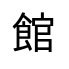

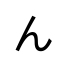

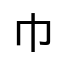

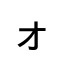

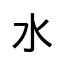

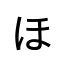

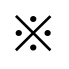

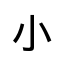

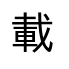

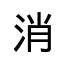

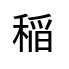

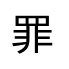

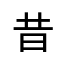

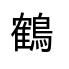

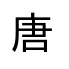

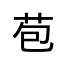

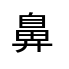

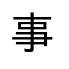

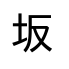

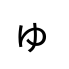

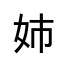

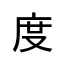

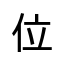

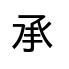

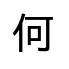

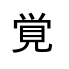

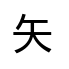

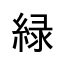

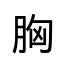

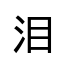

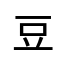

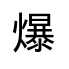

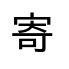

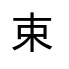

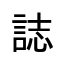

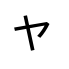

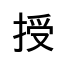

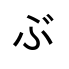

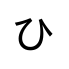

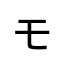

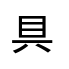

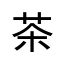

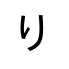

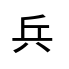

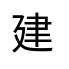

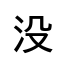

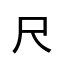

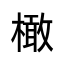

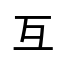

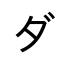

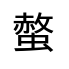

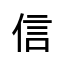

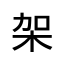

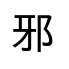

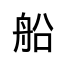

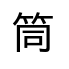

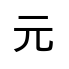

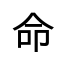

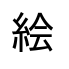

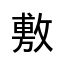

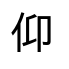

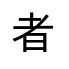

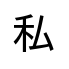

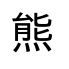

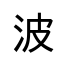

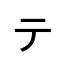

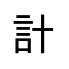

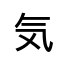

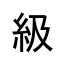

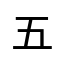

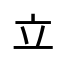

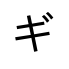

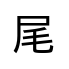

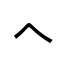

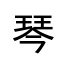

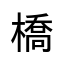

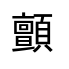

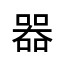

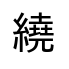

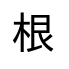

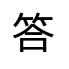

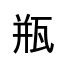

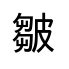

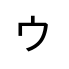

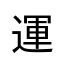

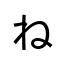

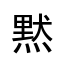

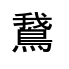

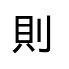

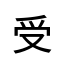

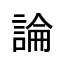

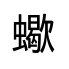

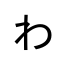

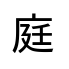

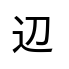

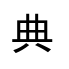

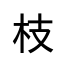

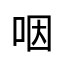

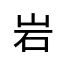

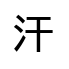

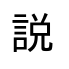

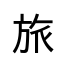

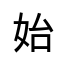

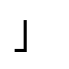

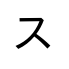

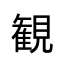

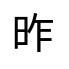

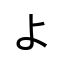

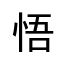

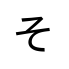

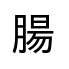

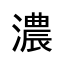

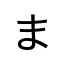

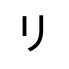

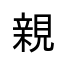

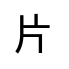

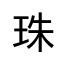

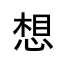

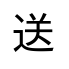

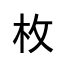

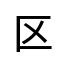

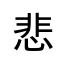

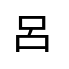

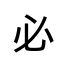

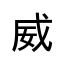

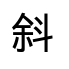

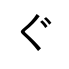

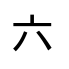

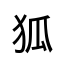

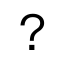

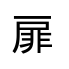

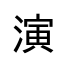

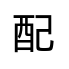

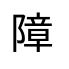

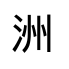

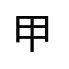

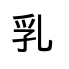

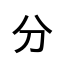

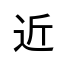

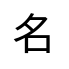

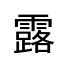

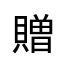

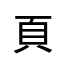

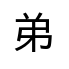

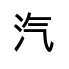

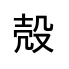

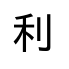

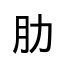

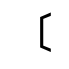

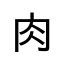

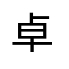

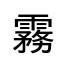

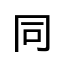

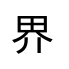

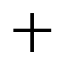

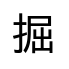

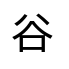

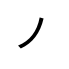

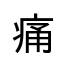

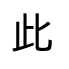

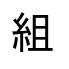

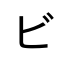

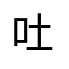

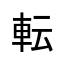

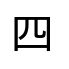

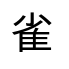

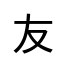

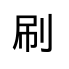

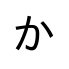

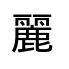

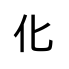

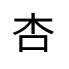

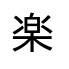

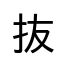

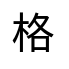

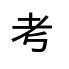

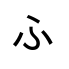

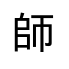

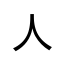

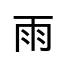

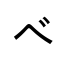

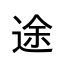

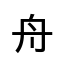

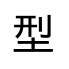

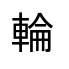

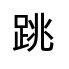

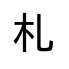

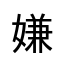

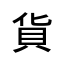

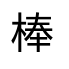

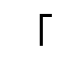

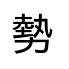

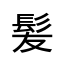

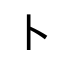

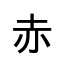

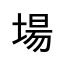

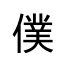

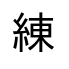

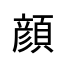

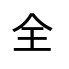

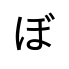

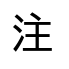

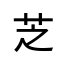

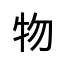

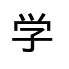

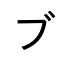

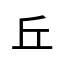

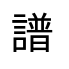

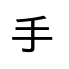

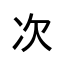

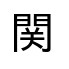

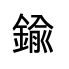

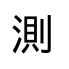

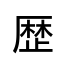

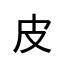

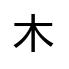

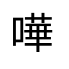

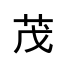

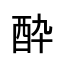

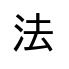

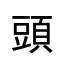

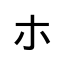

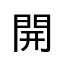

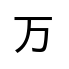

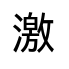

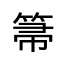

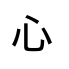

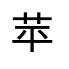

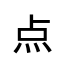

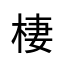

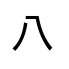

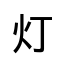

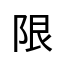

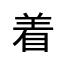

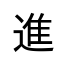

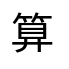

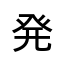

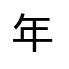

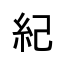

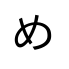

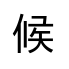

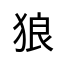

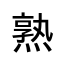

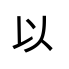

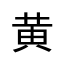

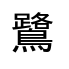

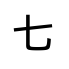

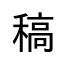

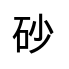

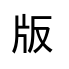

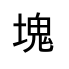

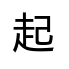

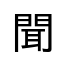

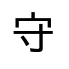

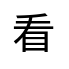

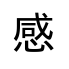

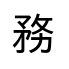

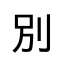

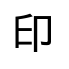

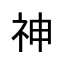

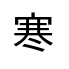

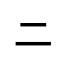

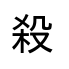

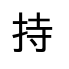

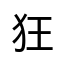

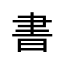

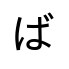

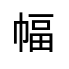

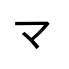

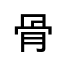

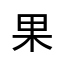

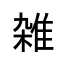

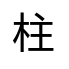

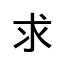

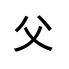

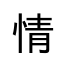

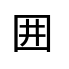

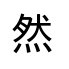

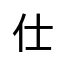

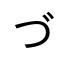

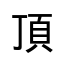

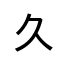

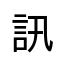

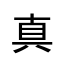

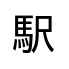

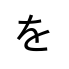

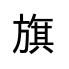

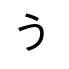

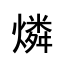

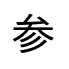

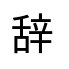

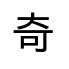

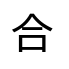

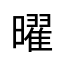

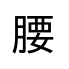

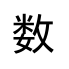

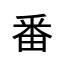

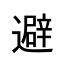

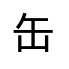

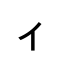

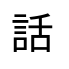

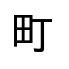

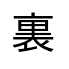

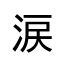

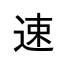

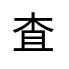

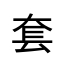

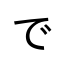

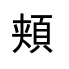

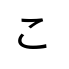

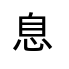

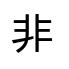

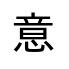

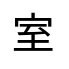

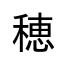

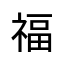

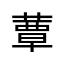

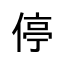

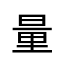

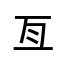

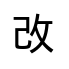

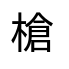

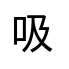

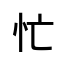

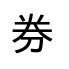

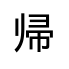

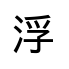

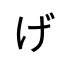

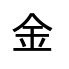

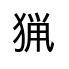

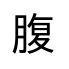

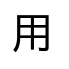

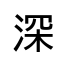

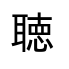

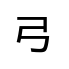

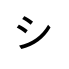

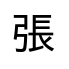

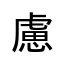

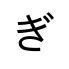

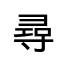

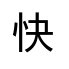

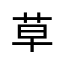

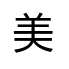

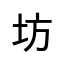

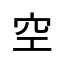

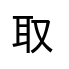

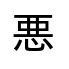

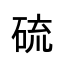

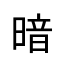

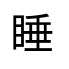

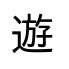

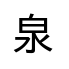

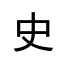

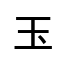

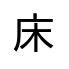

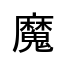

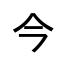

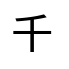

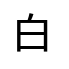

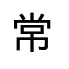

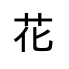

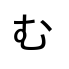

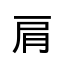

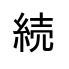

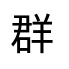

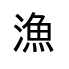

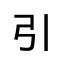

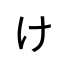

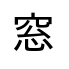

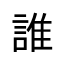

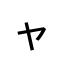

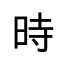

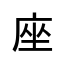

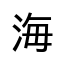

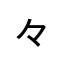

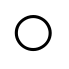

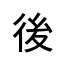

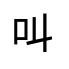

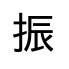

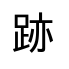

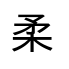

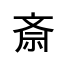

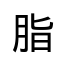

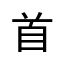

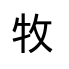

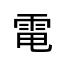

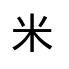

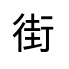

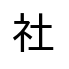

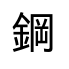

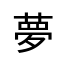

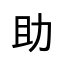

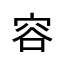

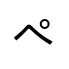

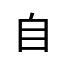

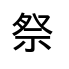

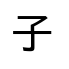

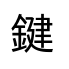

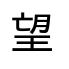

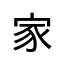

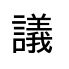

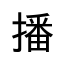

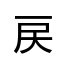

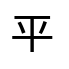

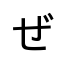

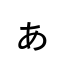

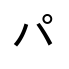

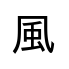

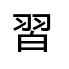

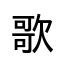

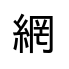

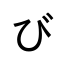

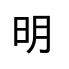

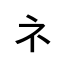

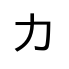

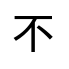

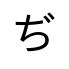

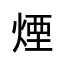

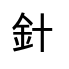

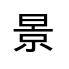

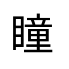

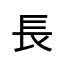

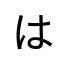

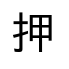

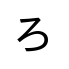

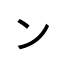

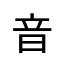

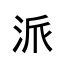

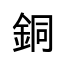

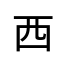

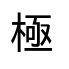

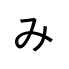

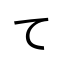

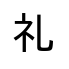

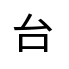

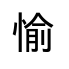

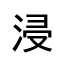

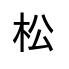

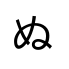

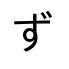

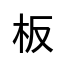

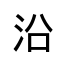

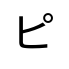

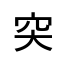

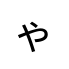

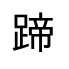

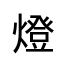

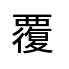

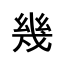

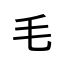

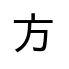

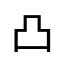

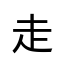

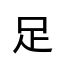

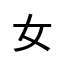

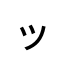

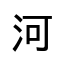

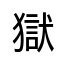

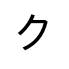

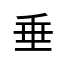

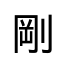

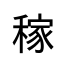

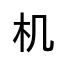

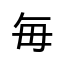

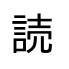

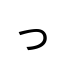

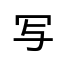

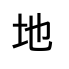

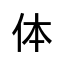

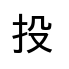

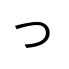

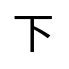

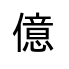

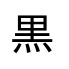

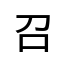

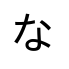

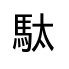

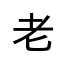

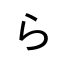

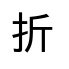

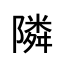

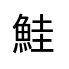

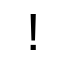

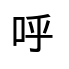

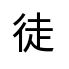

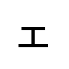

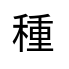

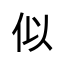

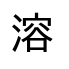

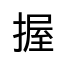

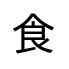

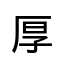

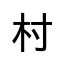

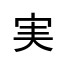

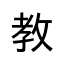

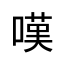

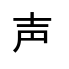

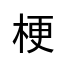

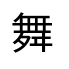

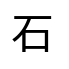

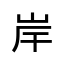

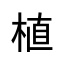

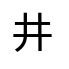

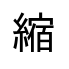

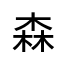

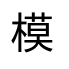

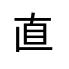

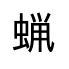

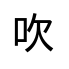

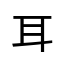

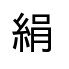

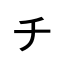

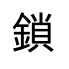

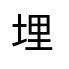

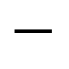

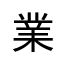

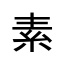

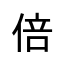

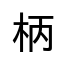

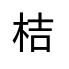

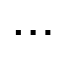

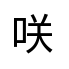

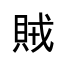

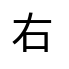

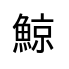

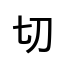

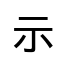

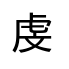

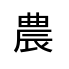

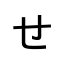

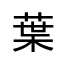

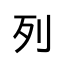

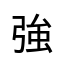

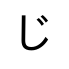

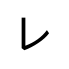

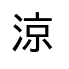

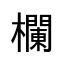

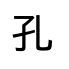

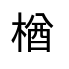

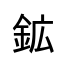

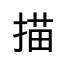

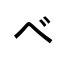

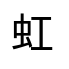

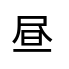

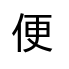

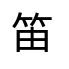

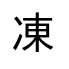

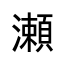

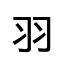

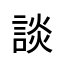

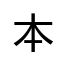

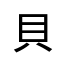

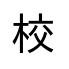

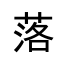

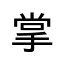

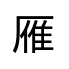

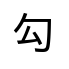

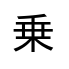

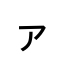

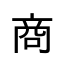

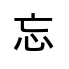

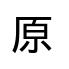

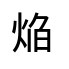

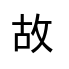

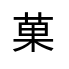

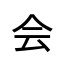

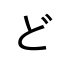

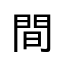

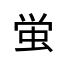

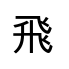

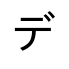

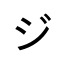

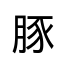

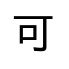

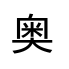

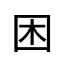

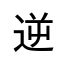

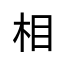

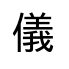

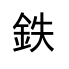

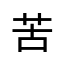

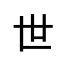

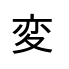

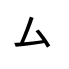

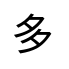

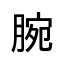

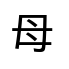

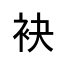

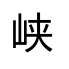

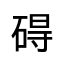

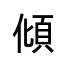

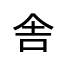

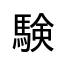

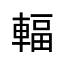

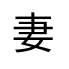

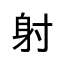

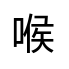

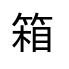

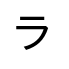

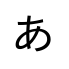

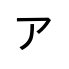

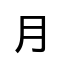

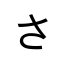

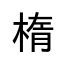

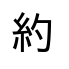

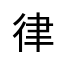

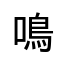

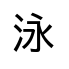

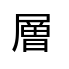

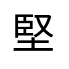

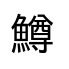

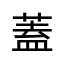

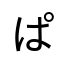

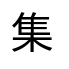

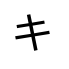

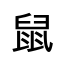

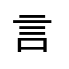

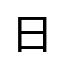

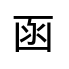

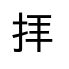

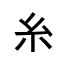

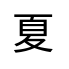

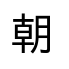

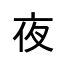

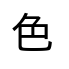

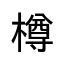

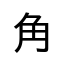

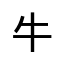

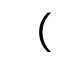

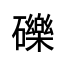

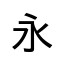

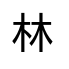

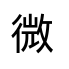

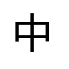

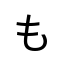

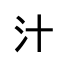

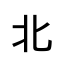

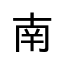

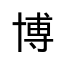

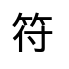

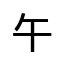

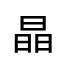

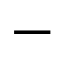

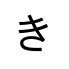

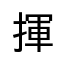

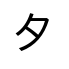

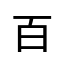

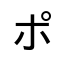

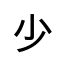

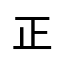

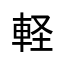

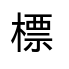

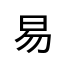

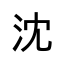

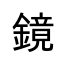

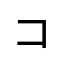

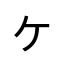

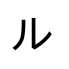

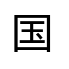

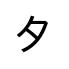

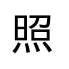

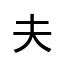

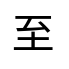

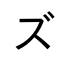

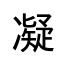

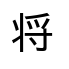

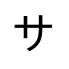

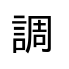

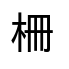

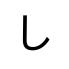

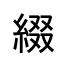

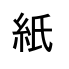

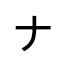

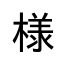

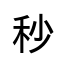

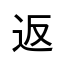

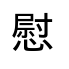

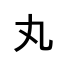

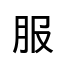

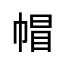

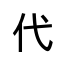

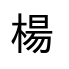

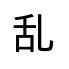

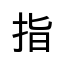

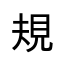

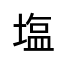

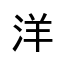

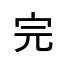

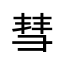

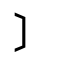

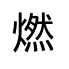

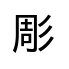

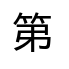

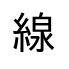

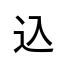

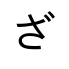

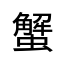

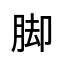

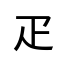

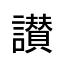

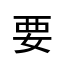

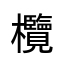

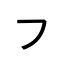

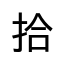

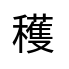

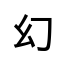

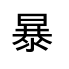

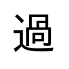

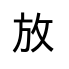

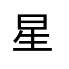

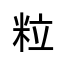

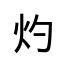

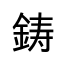

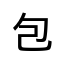

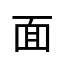

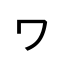

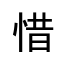

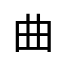

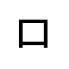

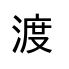

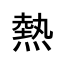

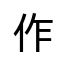

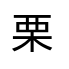

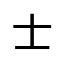

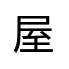

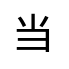

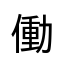

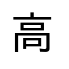

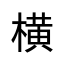

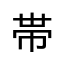

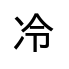

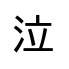

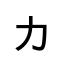

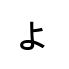

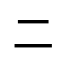

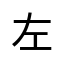

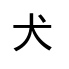

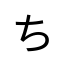

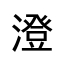

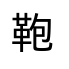

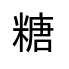

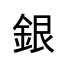

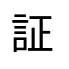

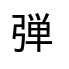

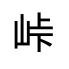

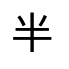

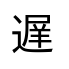

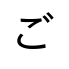

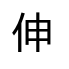

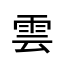

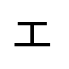

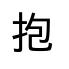

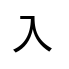

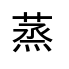

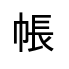

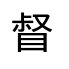

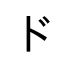

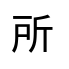

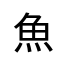

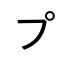

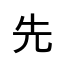

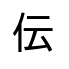

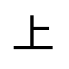

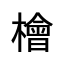

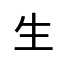

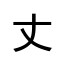

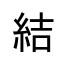

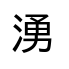

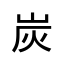

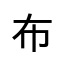

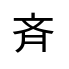

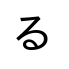

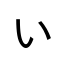

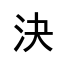

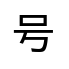

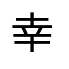

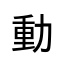

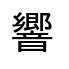

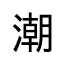

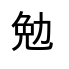

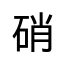

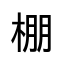

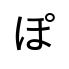

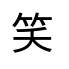

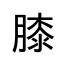

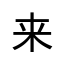

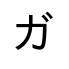

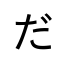

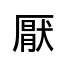

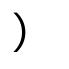

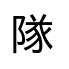

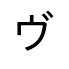

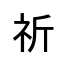

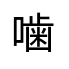

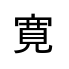

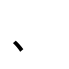

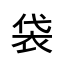

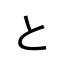

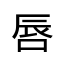

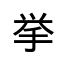

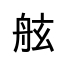

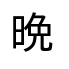

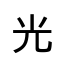

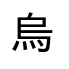

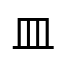

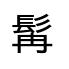

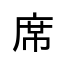

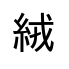

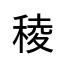

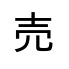

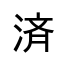

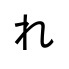

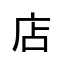

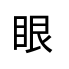

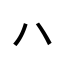

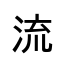

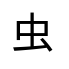

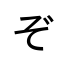

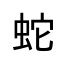

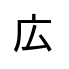

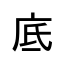

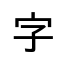

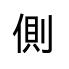

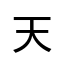

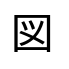

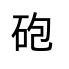

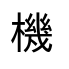

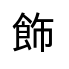

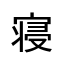

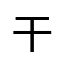

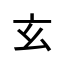

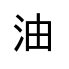

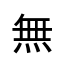

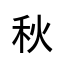

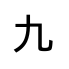

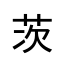

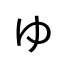

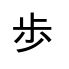

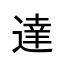

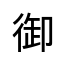

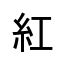

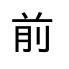

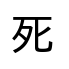

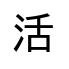

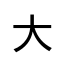

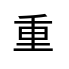

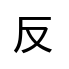

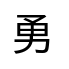

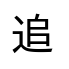

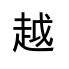

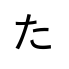

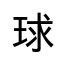

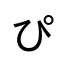

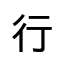

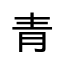

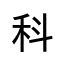

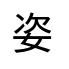

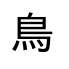

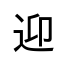

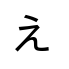

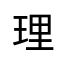

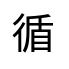

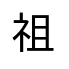

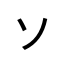

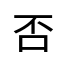

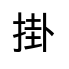

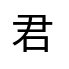

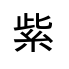

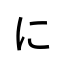

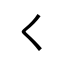

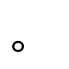

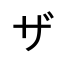

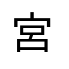

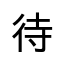

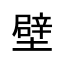

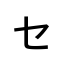

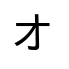

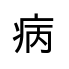

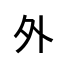

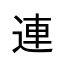

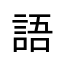

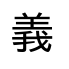

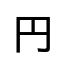

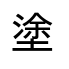

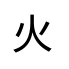

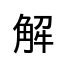

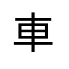

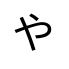

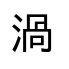

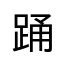

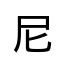

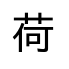

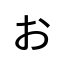

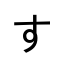

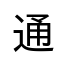

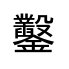

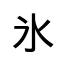

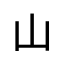

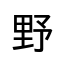

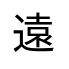

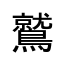

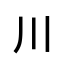

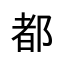

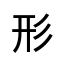

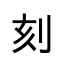

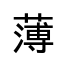

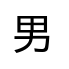

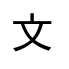

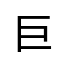

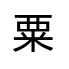

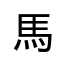

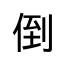

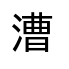

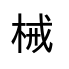

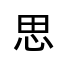

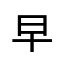

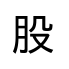

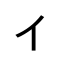

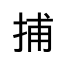

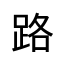

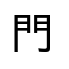

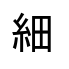

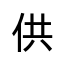

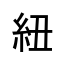

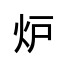

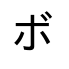

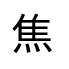

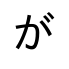

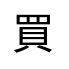

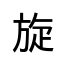

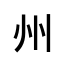

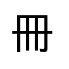

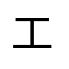

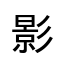

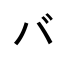

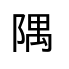

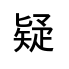

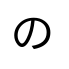

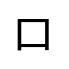

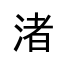

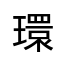

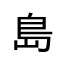

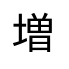

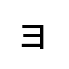

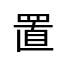

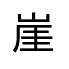

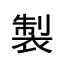

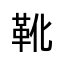

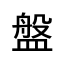

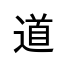

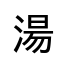

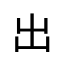

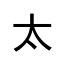

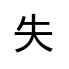

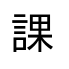

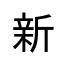

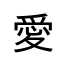

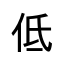

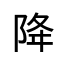

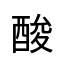

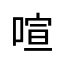

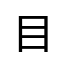

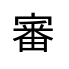

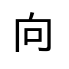

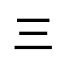

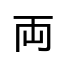

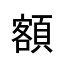

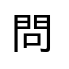

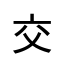

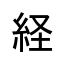

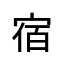

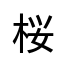

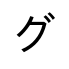

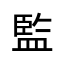

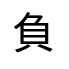

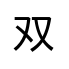

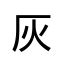

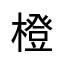

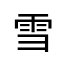

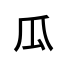

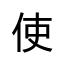

In [7]:
# テキストの1文字１文字をjpgファイルとして保存する


n = 0
#dupremoved_text = dupremoved_text[:10] #デバッグ用
for i in dupremoved_text:
    #ベースとなる400 x 400イメージを作成する（背景は白）
    base = np.full((400, 400,3), 255)
    
    fig, ax = plt.subplots(figsize=(0.64, 0.64))
    ax.axis("off")
    #ax.text(0, 0.2, "こ", size=32)
    ax.text(0, 0.2, i, size=32)
    file_name = "ja_chars/ja_%d.jpg" % (n)
    #テンポラリ
    plt.savefig(file_name)
    
    ja_c = image.load_img(file_name)
    ja_c = np.array(ja_c)
    #print(ja_c.shape)
    #(64, 64, 3)
    #矩形はりつけ
    base[0:64,0:64] = ja_c[0:64,0:64]
    save_img = array_to_img(base, scale = False)
    image.save_img(file_name, save_img)
    n += 1